## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data): 
   12 - quality (품질) (score between 0 and 10) 
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 더 달콤한 와인이 더 나은 평가를 받을까?
- 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 수집(gather)

In [2]:
red = pd.read_csv('./Datasets/winequality-red.csv', sep = ';')
white = pd.read_csv('./Datasets/winequality-white.csv', sep = ';')

### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

**누락 데이터 확인**

In [8]:
print(red.shape, white.shape)

(1599, 12) (4898, 12)


In [6]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**중복 데이터 확인**

In [19]:
red.duplicated().sum()

240

In [20]:
white.duplicated().sum()

937

**quality 컬럼(특성)의 고유값과 개수**

In [29]:
red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [30]:
white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [31]:
red['quality'].nunique()

6

In [32]:
white['quality'].nunique()

7

**통계 정보 확인**

In [33]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 2.3 정제(clean)

**중복데이터 삭제**

In [9]:
red.drop_duplicates(inplace = True)

In [10]:
white.drop_duplicates(inplace = True)

In [11]:
print(red.shape, white.shape)

(1359, 12) (3961, 12)


**두 데이터 프레임 합치기**

In [17]:
wine = pd.concat([red, white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.3 KB


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

### 3.1 새로 결합된 데이터 프레임으로 histogram 그리기
- fixed acidity, total sulfur dioxide, pH, alcohol 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

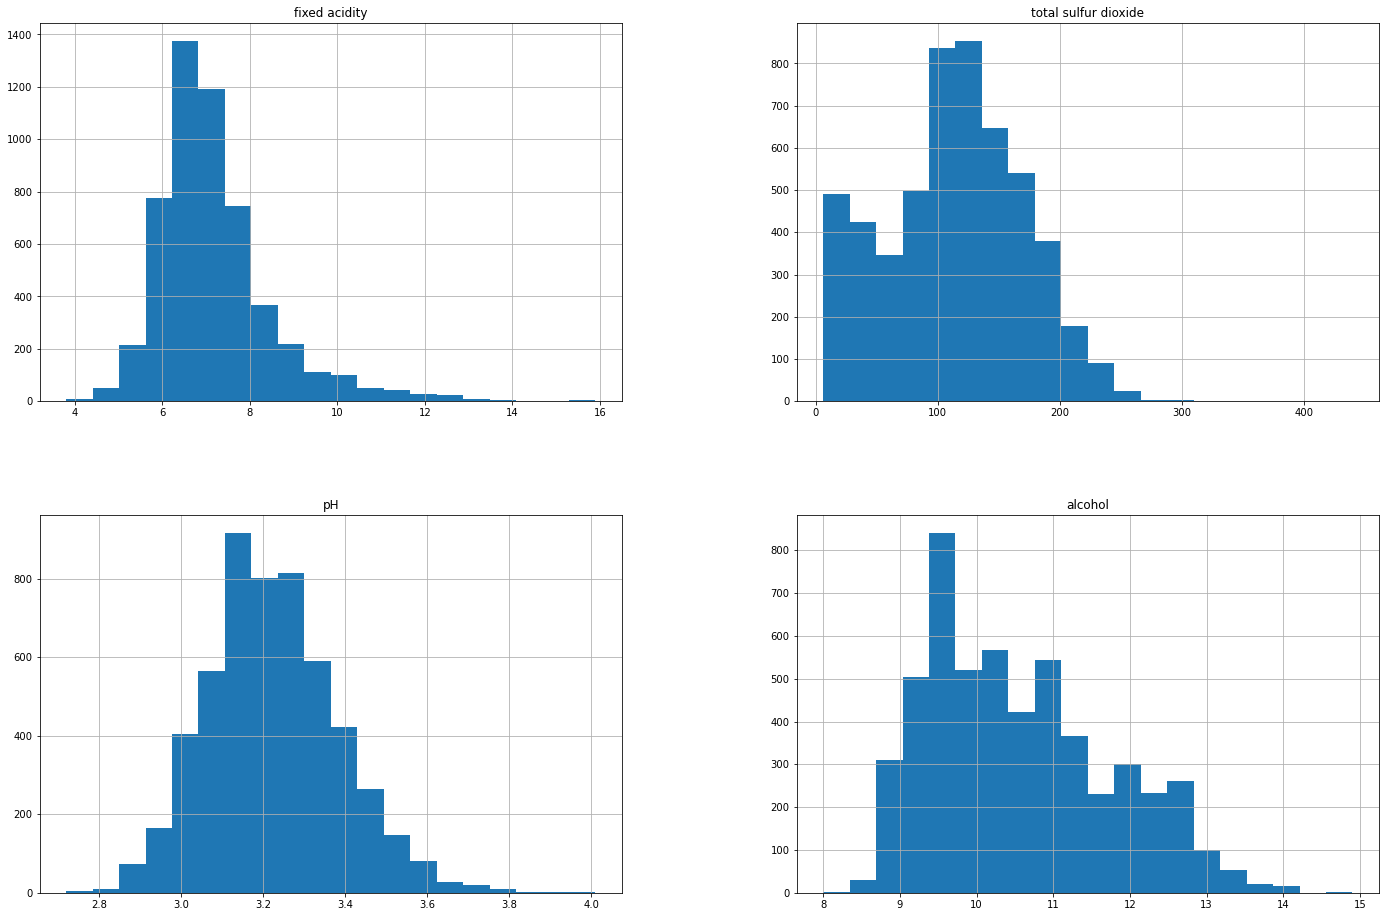

In [22]:
wine[['fixed acidity', 'total sulfur dioxide', 'pH', 'alcohol']].hist(bins = 20, figsize = (24, 16))

- Question) 특성 중 오른쪽으로 꼬리가 긴 분포(right skewed distribution)는 어떤것인가?
- Answer) fixed acidity

### 3.2 새로 결합된 데이터 프레임으로 산점도 그리기
- quality와 아래의 특성들간의 상관관계 파악하기
- volatile acidity, residual sugar, pH, alcohol

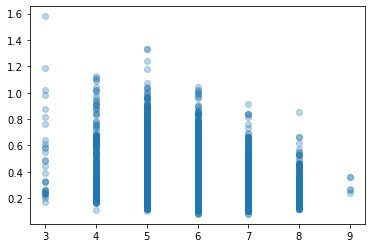

In [55]:
plt.scatter(data = wine, x = 'quality', y = 'volatile acidity', alpha = 0.3)

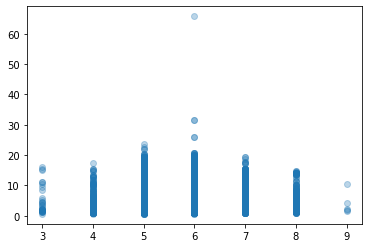

In [56]:
plt.scatter(data = wine, x = 'quality', y = 'residual sugar', alpha = 0.3)

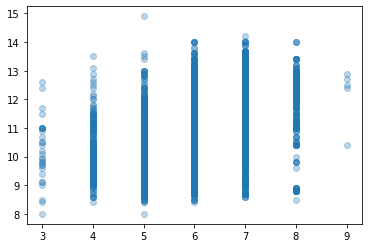

In [57]:
plt.scatter(data = wine, x = 'quality', y = 'alcohol', alpha = 0.3)

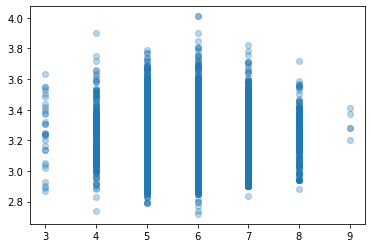

In [58]:
plt.scatter(data = wine, x = 'quality', y = 'pH', alpha = 0.3)

In [23]:
scatter_col = ['volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

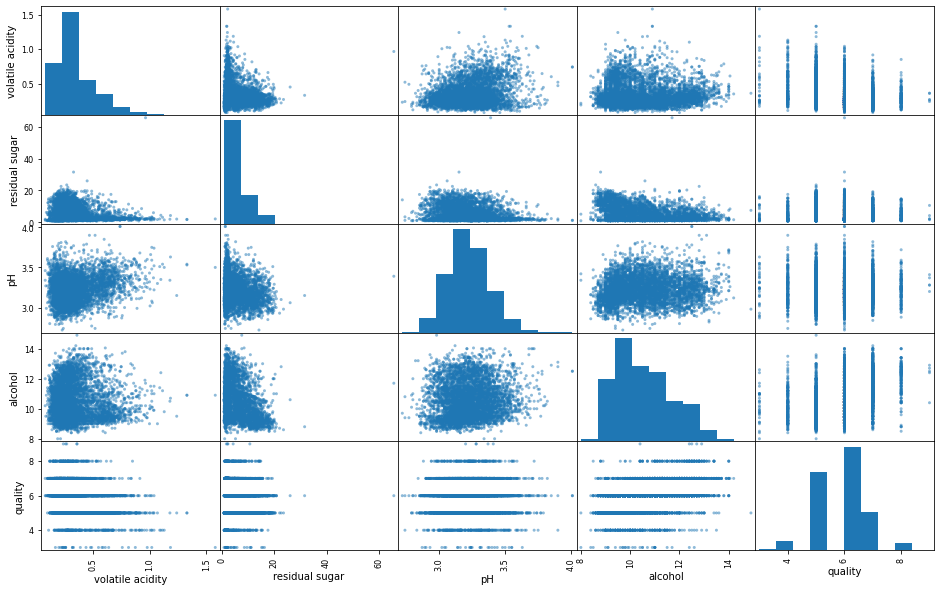

In [25]:
obj = pd.plotting.scatter_matrix(wine[scatter_col], figsize=(16, 10))

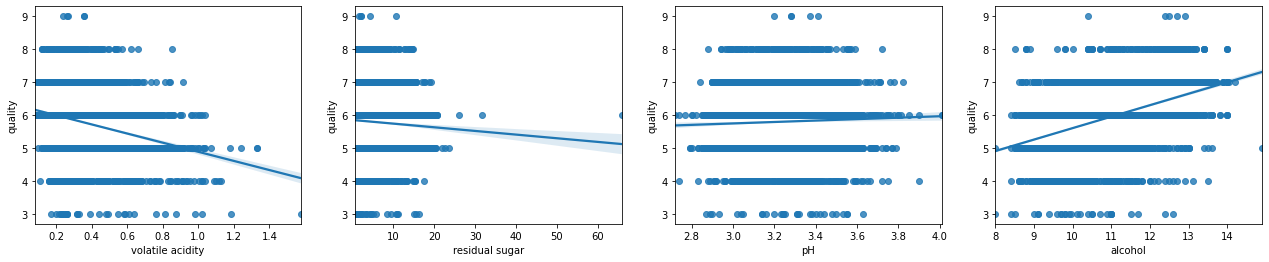

In [26]:
scatter_col = ['volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

figrue, axes = plt.subplots(nrows=1, ncols=len(scatter_col)-1, figsize=(22, 4))

for index, column in enumerate(scatter_col[:-1]):
    sns.regplot(data=wine[scatter_col], x=column, y='quality', ax=axes[index] )

In [27]:
wine[scatter_col].corr()

,volatile acidity,residual sugar,pH,alcohol,quality
volatile acidity,1.000000,-0.163696,0.246687,-0.065411,-0.265205
residual sugar,-0.163696,1.000000,-0.234522,-0.305242,-0.056830
pH,0.246687,-0.234522,1.000000,0.097314,0.039733
alcohol,-0.065411,-0.305242,0.097314,1.000000,0.469422
quality,-0.265205,-0.056830,0.039733,0.469422,1.000000


- Question) 품질에 긍정적인 영향을 미칠 가능성이 높은 특성은 어떤 것인가?
- Answer) alcohol

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

###  4.1 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?

In [29]:
red.value_counts().sum()

1359

In [30]:
white.value_counts().sum()

3961

In [31]:
red.mean()['quality']

5.6232523914643116

In [32]:
white.mean()['quality']

5.854834637717748

In [63]:
red['quality'].mean()

5.6360225140712945

In [64]:
white['quality'].mean()

5.87790935075541

- **분석결과** : red 와인보다 white 와인의 퀄리티가 평균적으로 더 높다. 따라서 white 와인이 더 좋은 평가를 받을 것이다.

###  4.2 어느 정도의 산도가 와인 품질에 영향을 미칠까?
- 산도를 4등분하여 (low, medium, medium_high, high ) 어느 단계의 quality의 평균값이 높은지 확인하기

In [33]:
wine['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [34]:
wi_pH = wine['pH']
wi_pH

0       3.51
1       3.20
2       3.26
3       3.16
5       3.51
        ... 
4893    3.27
4894    3.15
4895    2.99
4896    3.34
4897    3.26
Name: pH, Length: 5320, dtype: float64

In [35]:
bins = [2.72, 3.11, 3.21, 3.32, 4.01]
A = pd.cut(wi_pH, bins, labels = ["low", "medium", "medium_high", "high"])
A

0              high
1            medium
2       medium_high
3            medium
5              high
           ...     
4893    medium_high
4894         medium
4895            low
4896           high
4897    medium_high
Name: pH, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [36]:
wine['Acat'] = A
wine['Acat']

0              high
1            medium
2       medium_high
3            medium
5              high
           ...     
4893    medium_high
4894         medium
4895            low
4896           high
4897    medium_high
Name: Acat, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [37]:
wine.groupby('Acat').mean()['quality']

Acat
low            5.728024
medium         5.766917
medium_high    5.840183
high           5.847470
Name: quality, dtype: float64

<AxesSubplot:xlabel='Acat', ylabel='quality'>

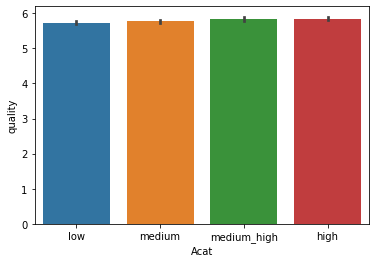

In [40]:
sns.barplot(data=wine, x='Acat', y='quality')

- **분석결과** : 산도가 high인 구간의 퀄리티가 가장 높다.

###  4.3 더 달콤한 와인이 더 나은 평가를 받을까?


In [41]:
wine['residual sugar'].describe()

count    5320.000000
mean        5.048477
std         4.500180
min         0.600000
25%         1.800000
50%         2.700000
75%         7.500000
max        65.800000
Name: residual sugar, dtype: float64

In [42]:
wi_pH = wine['residual sugar']
wi_pH

0       1.9
1       2.6
2       2.3
3       1.9
5       1.8
       ... 
4893    1.6
4894    8.0
4895    1.2
4896    1.1
4897    0.8
Name: residual sugar, Length: 5320, dtype: float64

In [43]:
bins = [0.6, 1.8, 3, 8.1, 65.8]
S = pd.cut(wi_pH, bins, labels = ["low", "medium", "medium_high", "high"])
S

0            medium
1            medium
2            medium
3            medium
5               low
           ...     
4893            low
4894    medium_high
4895            low
4896            low
4897            low
Name: residual sugar, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [44]:
wine['Scat'] = S
wine['Scat']

0            medium
1            medium
2            medium
3            medium
5               low
           ...     
4893            low
4894    medium_high
4895            low
4896            low
4897            low
Name: Scat, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [45]:
wine.groupby('Scat').mean()['quality']

Scat
low            5.785523
medium         5.800902
medium_high    5.894970
high           5.686189
Name: quality, dtype: float64

<AxesSubplot:xlabel='Scat', ylabel='quality'>

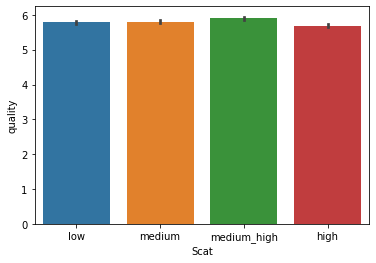

In [47]:
sns.barplot(data=wine, x='Scat', y='quality')

**분석 결과** : 어느 정도 적당하게 달아야 좋게 평가받는다. 단 거 원하면 사탕을 먹겠지.

###  4.4  알코올 도수가 높은 와인이 더 좋은 평가를 받을까?

In [48]:
wine['alcohol'].describe()

count    5320.000000
mean       10.549241
std         1.185933
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.900000
Name: alcohol, dtype: float64

In [49]:
wi_pH = wine['alcohol']
wi_pH

0        9.4
1        9.8
2        9.8
3        9.8
5        9.4
        ... 
4893    11.2
4894     9.6
4895     9.4
4896    12.8
4897    11.8
Name: alcohol, Length: 5320, dtype: float64

In [50]:
bins = [8.0, 9.5, 10.3, 11.3, 14.9]
B = pd.cut(wi_pH, bins, labels = ["low", "medium", "medium_high", "high"])
B

0               low
1            medium
2            medium
3            medium
5               low
           ...     
4893    medium_high
4894         medium
4895            low
4896           high
4897           high
Name: alcohol, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [51]:
wine['Bcat'] = B
wine['Bcat']

0               low
1            medium
2            medium
3            medium
5               low
           ...     
4893    medium_high
4894         medium
4895            low
4896           high
4897           high
Name: Bcat, Length: 5320, dtype: category
Categories (4, object): ['low' < 'medium' < 'medium_high' < 'high']

In [52]:
wine.groupby('Bcat').mean()['quality']

Bcat
low            5.354167
medium         5.539159
medium_high    5.903297
high           6.376113
Name: quality, dtype: float64

<AxesSubplot:xlabel='Bcat', ylabel='quality'>

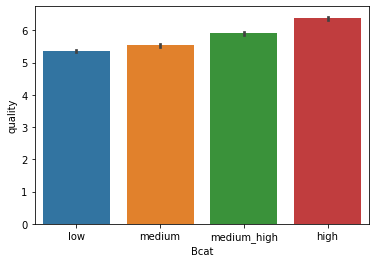

In [53]:
sns.barplot(data=wine, x='Bcat', y='quality')

**분석 결과** : 도수가 높을 수록 좋은 평가를 받았다. 술은 취하려고 마시는 거니까.

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.

예.